## Module Imports

In [1]:
import importMat as im
import experimentList as el
import angleDataframeCreation as adc
import plottingFunctions as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import spectrogram
from scipy.signal import hilbert, butter, filtfilt, firls, savgol_filter, lfilter
import scipy.io as spio
import scipy.stats as stats
import emd
import constants as const
import pandas as pd
import seaborn as sns
import matplotlib as mpl

Loading DLC 2.3.6...


## Create dataframe, do not touch unless recreating dataframe!

In [2]:
df = adc.createDataFrame()

2024_08_28_E1 added to Dataframe.
2024_08_29_E1 added to Dataframe.
2024_08_29_E5 added to Dataframe.
2024_08_30_E3 added to Dataframe.
2024_08_30_E6 added to Dataframe.
2024_08_30_E7 added to Dataframe.
2024_09_03_E3 added to Dataframe.
2024_09_03_E7 added to Dataframe.
2024_09_03_E9 added to Dataframe.
2024_08_28_E2 added to Dataframe.
2024_08_29_E4 added to Dataframe.
2024_08_30_E1 added to Dataframe.
2024_08_30_E4 added to Dataframe.
2024_08_30_E8 added to Dataframe.
2024_09_03_E5 added to Dataframe.
2024_09_03_E8 added to Dataframe.
2024_08_29_E2 added to Dataframe.
2024_08_29_E3 added to Dataframe.
2024_08_29_E6 added to Dataframe.
2024_08_30_E2 added to Dataframe.
2024_08_30_E5 added to Dataframe.
2024_09_03_E1 added to Dataframe.
2024_09_03_E4 added to Dataframe.
2024_09_03_E6 added to Dataframe.


## Load dataframe, must do everytime kernel is reset

In [2]:
df = pf.loadDataFrame(cameraView='dorsal')
df['flight'] = [np.all(fBool) for fBool in df['flightBool']]
df['noFlight'] = [np.all(fBool == False) for fBool in df['flightBool']]

## Average of data plots across time for all frequencies and conditions

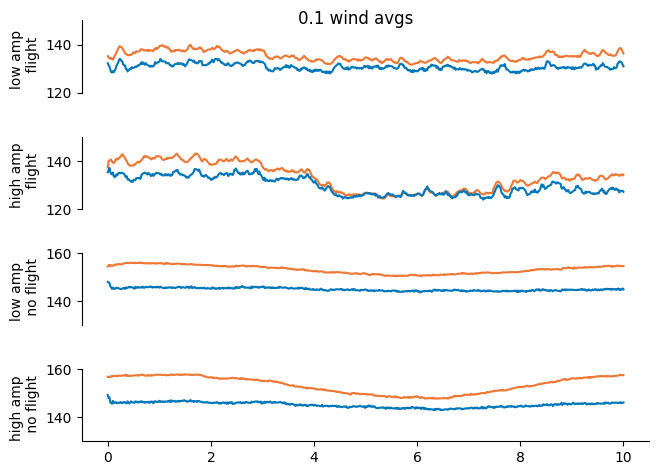

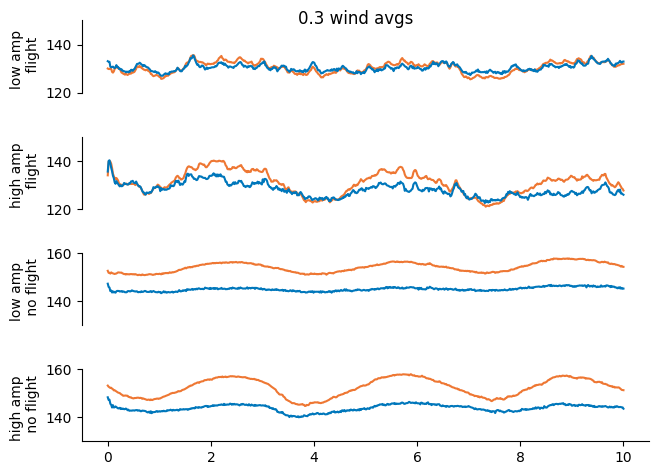

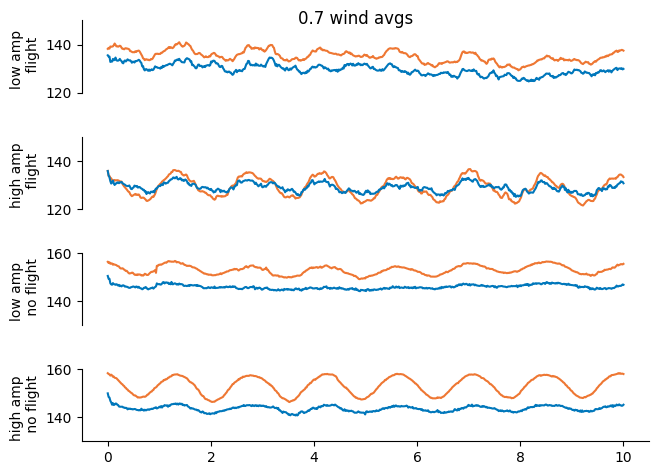

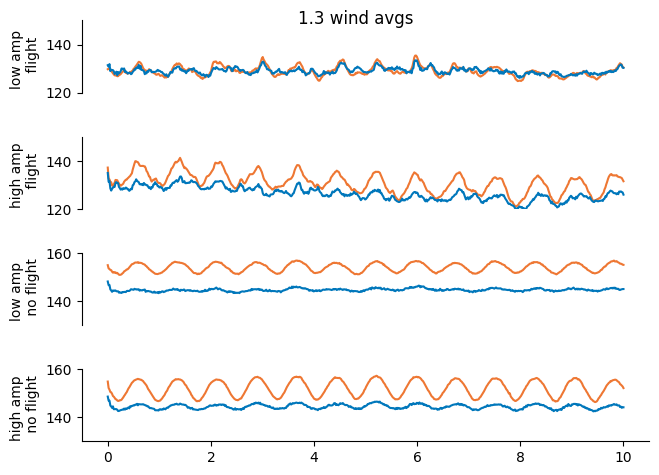

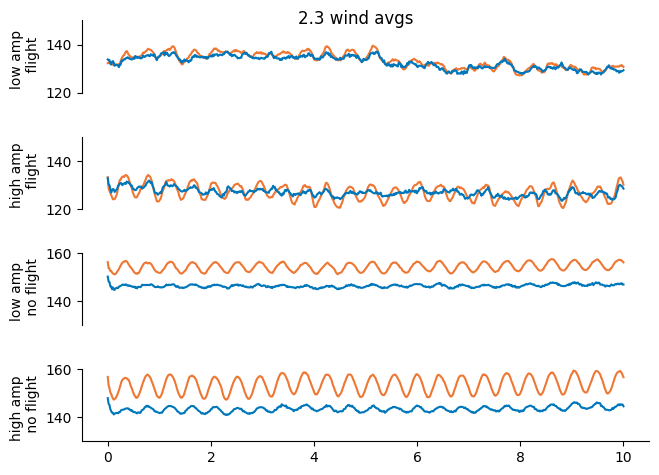

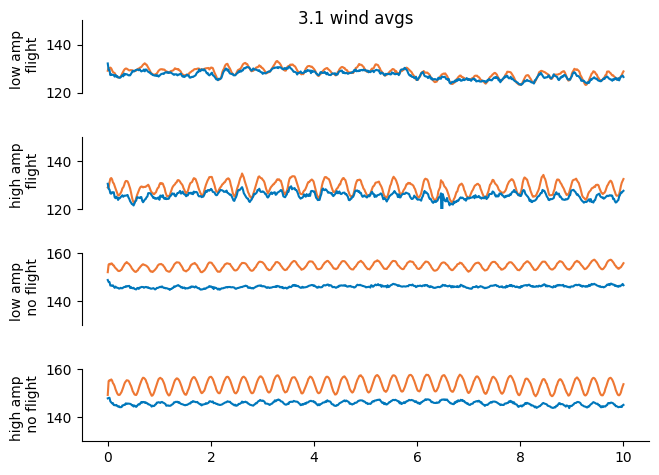

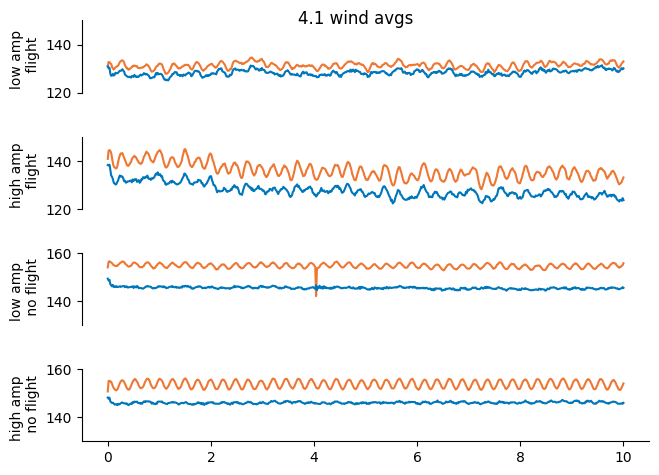

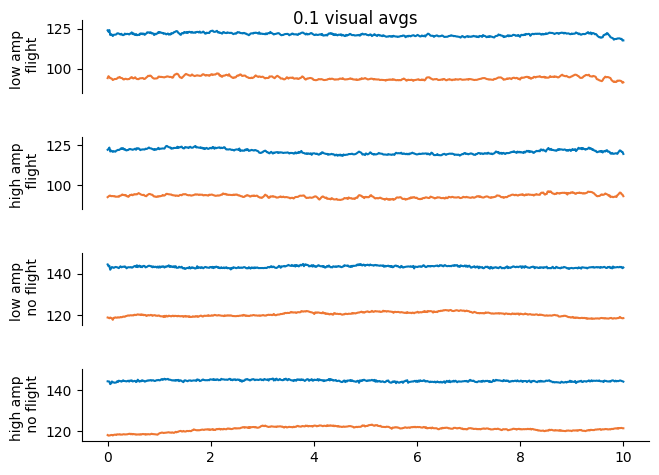

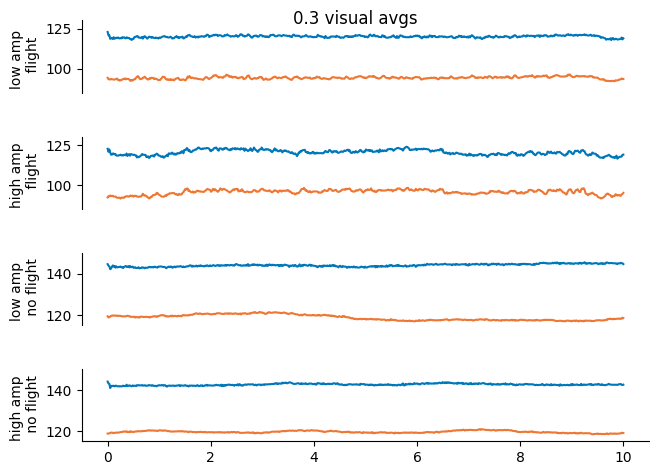

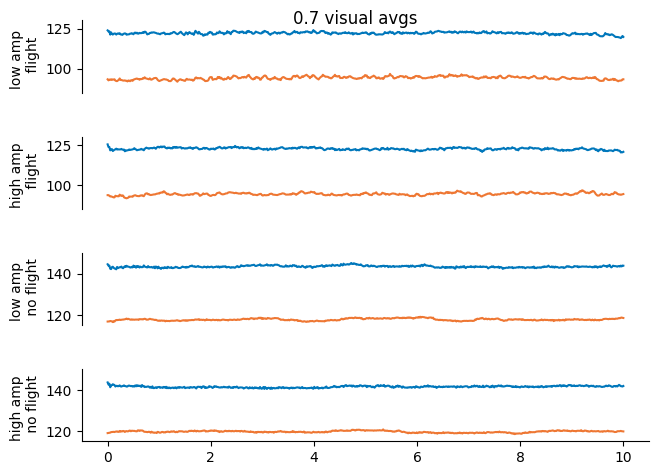

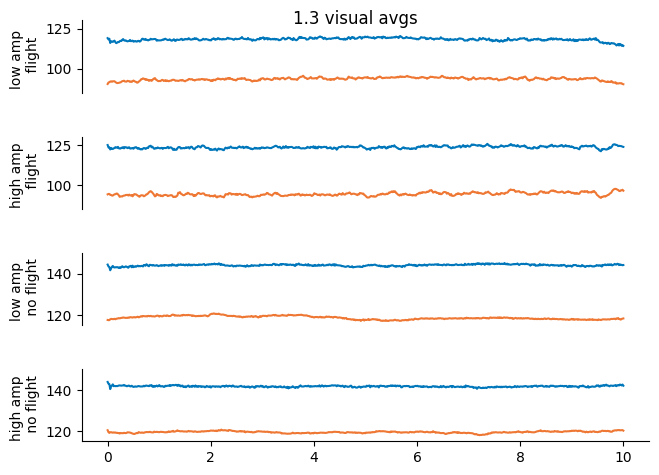

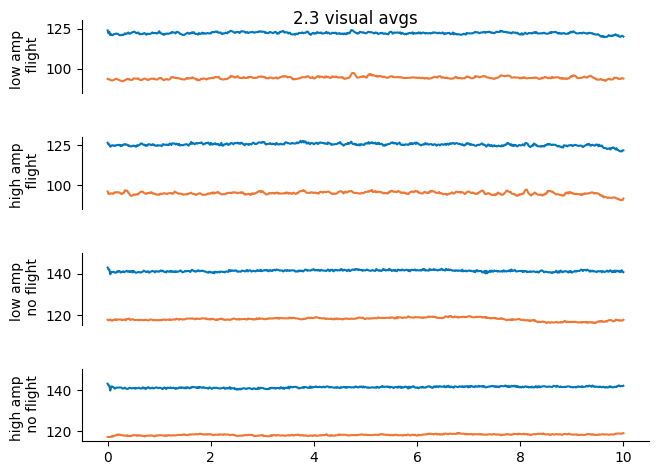

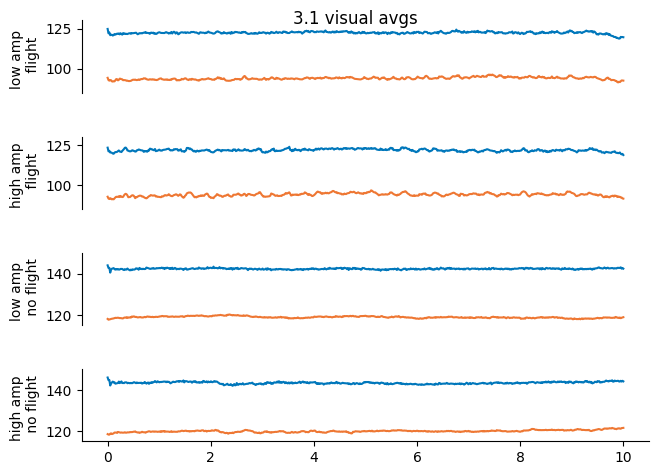

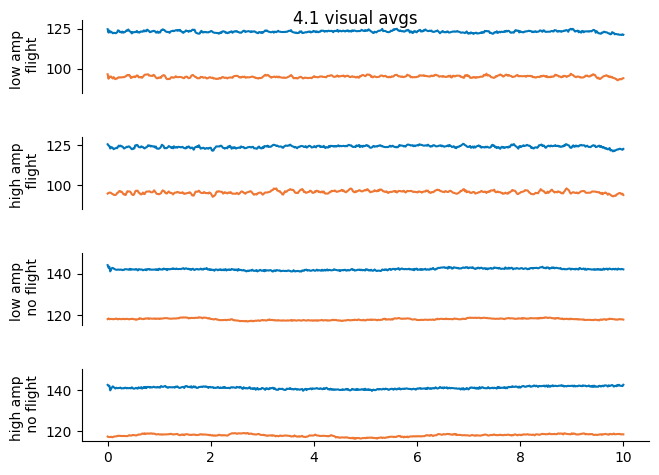

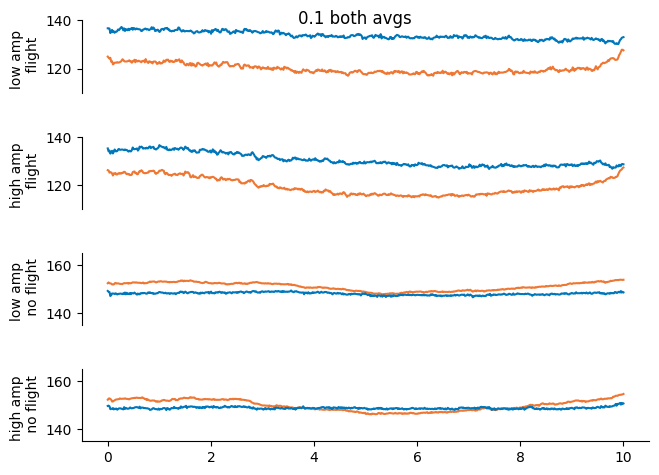

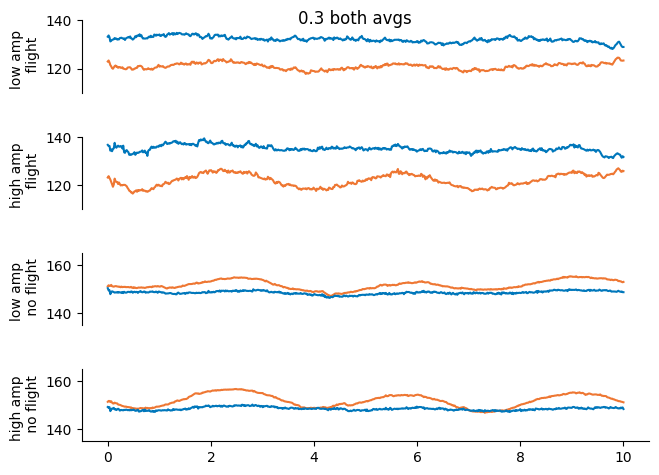

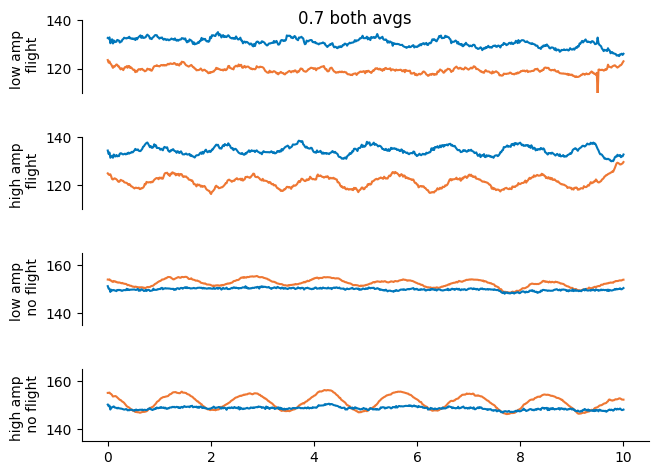

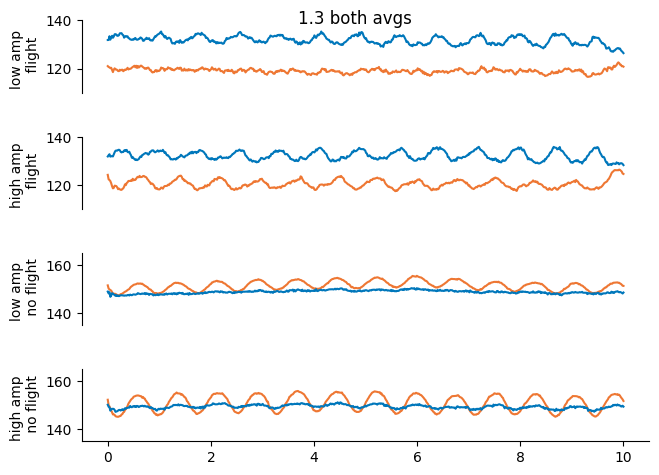

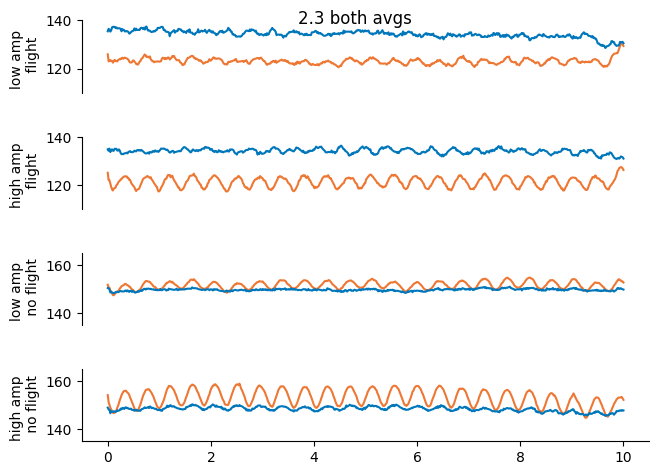

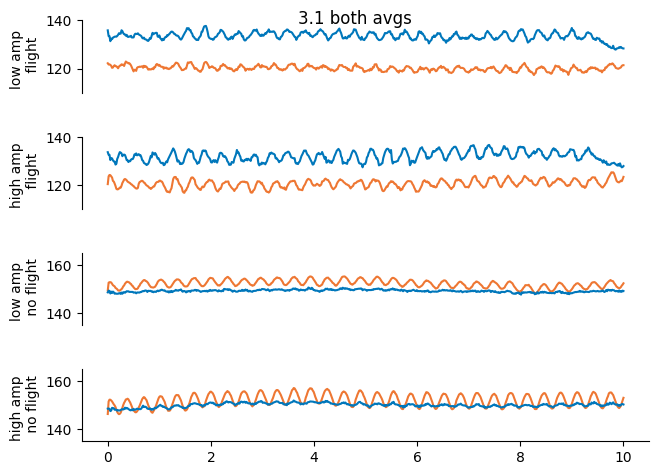

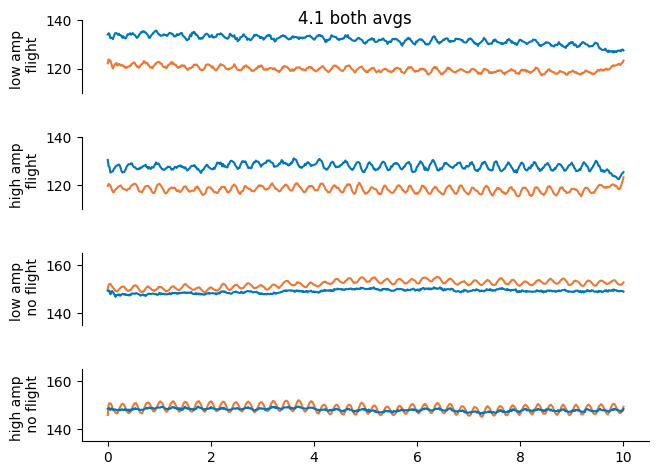

In [105]:
#AVG DATA PLOTS
freqs = [0.1, 0.3, 0.7, 1.3, 2.3, 3.1, 4.1]
conditions = ['wind','visual','both']
f_bounds = [[120,150],[85,130],[110,140]]
nf_bounds = [[130,160],[115,150],[135,165]]
n = 0
for i,condition in enumerate(conditions):
    for freq in freqs:
        lowAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        lowAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        highAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()
        highAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()

        x = np.linspace(0,10,600)
        fig, axes = plt.subplots(4,1)
        fig.tight_layout()
        axes[0].plot(x,np.mean(np.array([trial[:,0] for trial in lowAmp_df_flight['iaa'].to_list()]),axis=0),color=const.orange)
        axes[0].plot(x,np.mean(np.array([trial[:,1] for trial in lowAmp_df_flight['iaa'].to_list()]),axis=0),color=const.blue)
        axes[1].plot(x,np.mean(np.array([trial[:,0] for trial in highAmp_df_flight['iaa'].to_list()]),axis=0),color=const.orange)
        axes[1].plot(x,np.mean(np.array([trial[:,1] for trial in highAmp_df_flight['iaa'].to_list()]),axis=0),color=const.blue)
        axes[2].plot(x,np.mean(np.array([trial[:,0] for trial in lowAmp_df_noFlight['iaa'].to_list()]),axis=0),color=const.orange)
        axes[2].plot(x,np.mean(np.array([trial[:,1] for trial in lowAmp_df_noFlight['iaa'].to_list()]),axis=0),color=const.blue)
        axes[3].plot(x,np.mean(np.array([trial[:,0] for trial in highAmp_df_noFlight['iaa'].to_list()]),axis=0),color=const.orange)
        axes[3].plot(x,np.mean(np.array([trial[:,1] for trial in highAmp_df_noFlight['iaa'].to_list()]),axis=0),color=const.blue)
        axes[0].spines[['right', 'top','bottom']].set_visible(False)
        axes[0].xaxis.set_visible(False)
        axes[0].set_ylabel('low amp \n flight')
        axes[0].set_ylim(f_bounds[i])
        axes[1].spines[['right', 'top','bottom']].set_visible(False)
        axes[1].xaxis.set_visible(False)
        axes[1].set_ylabel('high amp \n flight')
        axes[1].set_ylim(f_bounds[i])
        axes[2].spines[['right', 'top','bottom']].set_visible(False)
        axes[2].xaxis.set_visible(False)
        axes[2].set_ylabel('low amp \n no flight')
        axes[2].set_ylim(nf_bounds[i])
        axes[3].spines[['right', 'top']].set_visible(False)
        axes[3].set_ylabel('high amp \n no flight')
        axes[3].set_ylim(nf_bounds[i])
        fig.suptitle(str(freq) + ' ' + condition + ' ' + 'avgs')
        fig.savefig(str(freq)+'_'+condition+'_avgs'+'.png',format='png', bbox_inches='tight')

## Fig S4C

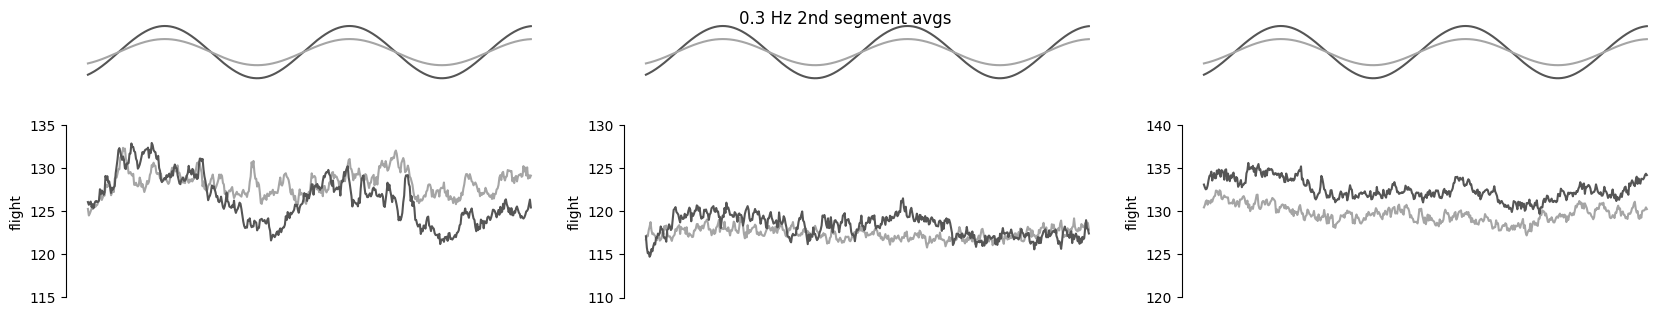

In [3]:
#LINEAR EFFECT PLOTS
freqs = [0.3]
conditions = ['wind','visual','both']
f_bounds = [[115,135],[110,130],[120,140]]

lgrey = np.array([165,165,165])/255
dgrey = np.array([85,85,85])/255

data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2]])
phases = np.array([phases[2]])
time = np.arange(0, 12, 1/20000)
orig_theta = phases
f=0.3 
samprate = 60
N = samprate * 10
T = 1.0 / samprate
# Create a signal
x = np.linspace(0.0, N*T, N)
pad = np.zeros((600,1))
        
# sinewave (stimulus)
N_input = samprate * 12
x_input = np.linspace(0.0, N_input*T,N_input)
        
sinewave = np.sin(2 * np.pi * f * x_input - orig_theta)
new_sinewave = sinewave[180:-60]


fig, axes = plt.subplots(2,3,figsize=(17,10/3),gridspec_kw={'height_ratios': [1,3]})
for i,condition in enumerate(conditions):
    for freq in freqs:
        lowAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        #lowAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        highAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()
        #highAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()

        x = np.linspace(0,10,480)
        fig.tight_layout()
        axes[0,i].plot(new_sinewave,c=dgrey)
        axes[0,i].plot(new_sinewave/2,c=lgrey)
        axes[0,i].spines[['left','right', 'top','bottom']].set_visible(False)
        axes[0,i].xaxis.set_visible(False)
        axes[0,i].yaxis.set_visible(False)
        axes[1,i].plot(x,np.mean(np.array([trial[:,1] for trial in lowAmp_df_flight['iaa'].to_list()]),axis=0)[60:-60],color=lgrey)
        axes[1,i].plot(x,np.mean(np.array([trial[:,1] for trial in highAmp_df_flight['iaa'].to_list()]),axis=0)[60:-60],color=dgrey)
        axes[1,i].spines[['right', 'top','bottom']].set_visible(False)
        axes[1,i].xaxis.set_visible(False)
        axes[1,i].set_ylabel('flight')
        axes[1,i].set_ylim(f_bounds[i])
        
fig.suptitle(str(freq) + ' Hz 2nd segment avgs')
fig.savefig('S4C'+'.pdf',format='pdf', bbox_inches='tight')

## Fig S4D

8
7
22
LowAmp_f Condition: wind Freq: 0.3 Gain: 1.183533483228353  n= 8 N= 4
HighAmp_f Condition: wind Freq: 0.3 Gain: 2.681236715713443  n= 7 N= 4
LowAmp_nf Condition: wind Freq: 0.3 Gain: 0.6527521677077254  n= 23 N= 8
HighAmp_nf Condition: wind Freq: 0.3 Gain: 1.7856467271507437  n= 25 N= 9
14
7
13
LowAmp_f Condition: visual Freq: 0.3 Gain: 0.2520672156699438  n= 14 N= 6
HighAmp_f Condition: visual Freq: 0.3 Gain: 1.0732161144214112  n= 7 N= 5
LowAmp_nf Condition: visual Freq: 0.3 Gain: 0.3065084862874526  n= 14 N= 7
HighAmp_nf Condition: visual Freq: 0.3 Gain: 0.2938574899630121  n= 20 N= 7
13
12
17
LowAmp_f Condition: both Freq: 0.3 Gain: 0.8311748086410835  n= 13 N= 7
HighAmp_f Condition: both Freq: 0.3 Gain: 1.0190795860623874  n= 12 N= 6
LowAmp_nf Condition: both Freq: 0.3 Gain: 0.6791534820898163  n= 18 N= 8
HighAmp_nf Condition: both Freq: 0.3 Gain: 0.7301920728647621  n= 19 N= 8
-----------------------
0.3
['wind', 'visual', 'both']
['wind', 'visual', 'both']
['wind', 'visua

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-----------------------
2.3
['wind', 'visual', 'both']
['wind', 'visual', 'both']
['wind', 'visual', 'both']
['wind', 'visual', 'both']
-----------------------
[[[1.55818431 0.81401966 0.67959892]
  [0.9429092  0.28384502 0.86244815]
  [0.54427057 0.19647193 2.55793464]]

 [[2.38382142 1.410198   0.68009715]
  [1.38973291 0.6843009  0.98725358]
  [0.56214837 0.85991678 8.05240421]]]
[[[ 2.01071055  3.18158613  0.92378244]
  [ 0.45516387  1.59242745  0.85232777]
  [ 1.22233857  1.08371217  0.82978954]]

 [[ 7.92685578 11.28135849  2.81125121]
  [ 0.91470168  2.17673494  1.21507215]
  [ 4.21410546  3.00164242  1.92191187]]]
wind
--------------------
gain 95% ci across frequencies:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


visual
--------------------
gain 95% ci across frequencies:


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


both
--------------------
gain 95% ci across frequencies:


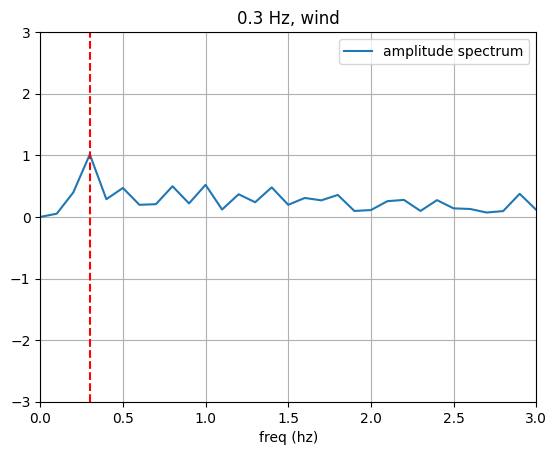

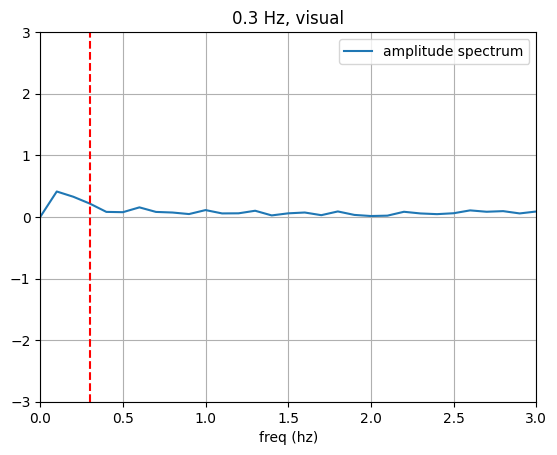

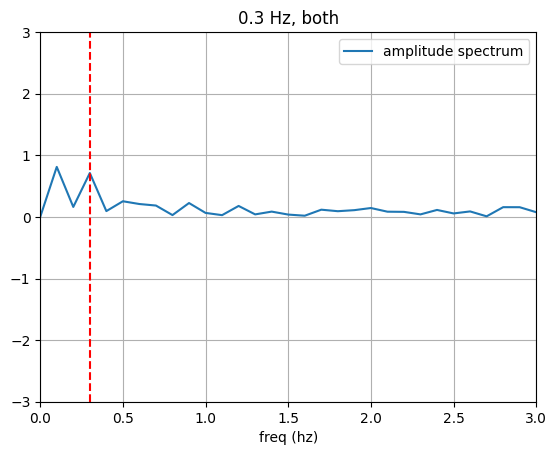

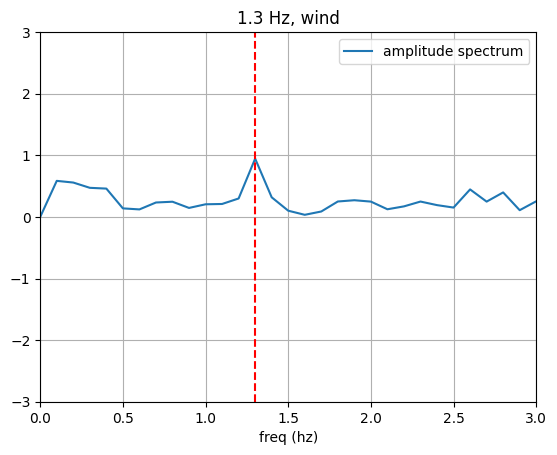

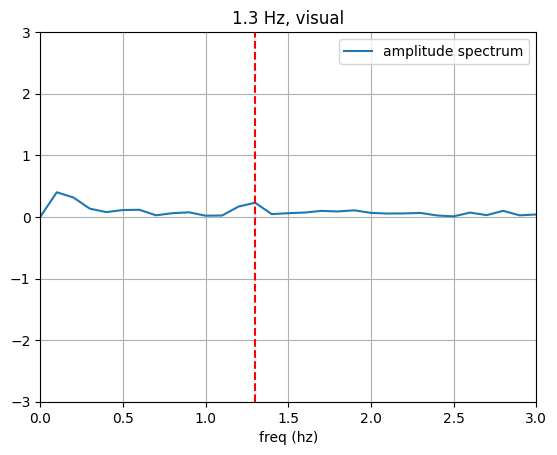

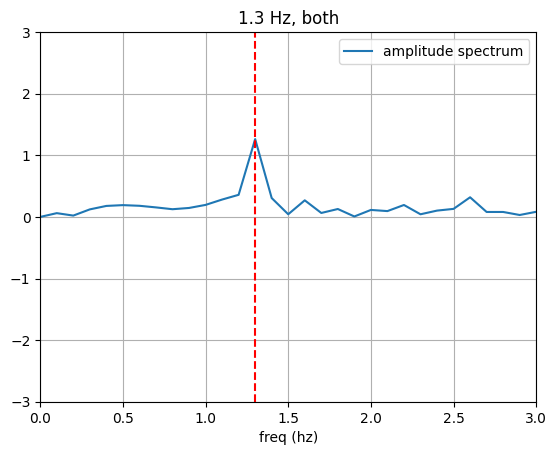

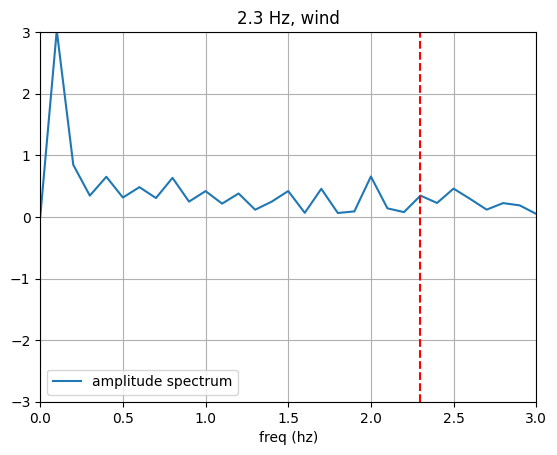

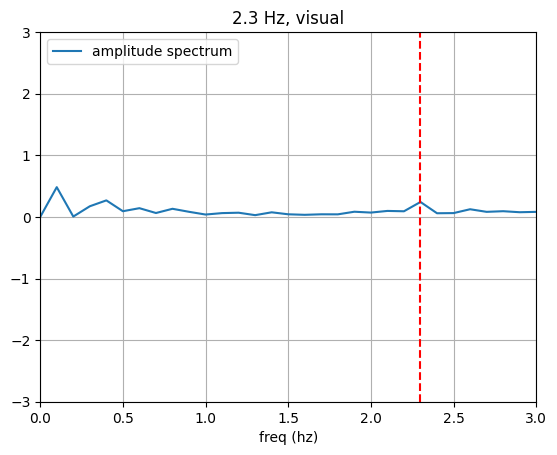

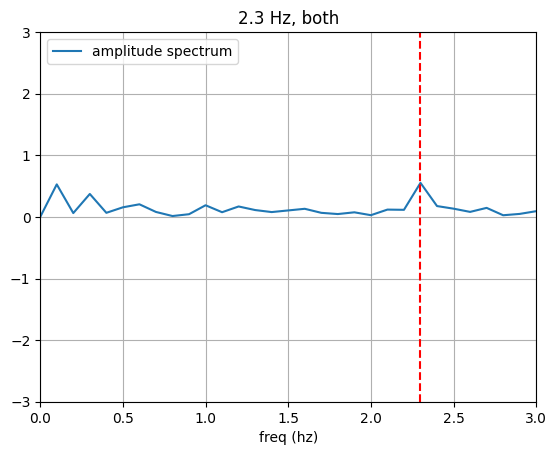

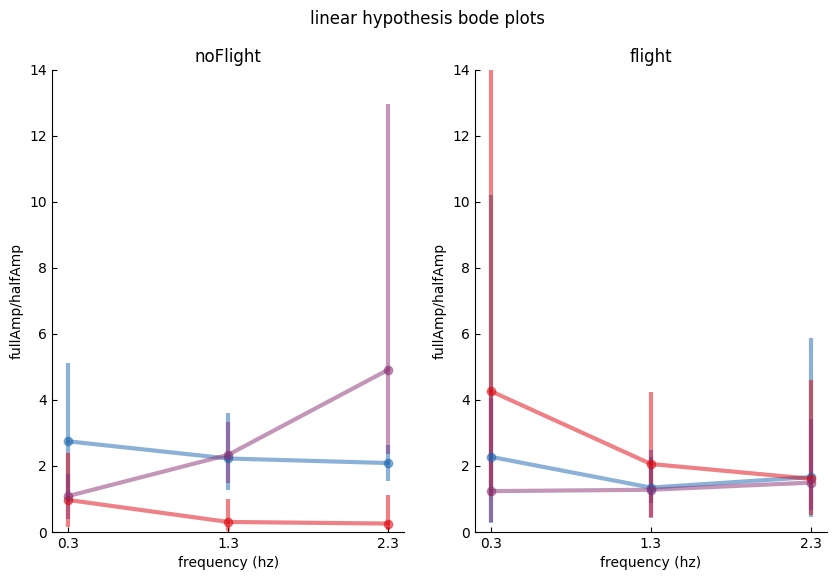

In [5]:
# Fs = 20000

freqs = [0.3,1.3, 2.3]

freqs = [0.3,1.3, 2.3]
purp9 = np.array([136,46,114])/255
blue10 = np.array([25,101,176])/255
red26 = np.array([220,5,12])/255
palette = [blue10,red26,purp9]

data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2], freq_list[6], freq_list[9]])
phases = np.array([phases[2], phases[6],phases[9]])
time = np.arange(0, 12, 1/20000)

conditions = ['wind','visual','both']
#f_bounds = [[120,150],[85,130],[110,140]]
#nf_bounds = [[130,160],[115,150],[135,165]]
n = 0

nf_gainArr = np.zeros((3,3))
f_gainArr = np.zeros((3,3))
nf_gain_ci = np.zeros((2,3,3))
f_gain_ci = np.zeros((2,3,3))
rng = np.random.default_rng()
num_mc_reps = 100
for i, f in enumerate(freqs):
    freq = f
    orig_theta = phases[i]
    #sinewave = np.sin(2 * np.pi * freq * time - theta)
    lowAmp_flightLegend = ['wind','visual','both']
    highAmp_flightLegend = ['wind','visual','both']
    lowAmp_noFlightLegend = ['wind','visual','both']
    highAmp_noFlightLegend = ['wind','visual','both']
    for k,condition in enumerate(conditions):

        lowAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        lowAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        highAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()
        highAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()

        conCount_lowAmpFlight = len(np.array([trial[:,1] for trial in lowAmp_df_flight['iaa'].to_list()]))
        lowAmp_flight_arr = np.array([trial[:,1] for trial in lowAmp_df_flight['iaa'].to_list()])
        lowAmp_flight = np.nanmean(lowAmp_flight_arr,axis=0)

        conCount_highAmpFlight = len(np.array([trial[:,1] for trial in highAmp_df_flight['iaa'].to_list()]))
        highAmp_flight_arr = np.array([trial[:,1] for trial in highAmp_df_flight['iaa'].to_list()])
        highAmp_flight = np.nanmean(highAmp_flight_arr,axis=0)
        
        conCount_lowAmpNoFlight = len(np.array([trial[:,1] for trial in lowAmp_df_noFlight['iaa'].to_list()]))
        lowAmp_noFlight_arr = np.array([trial[:,1] for trial in lowAmp_df_noFlight['iaa'].to_list()])
        lowAmp_noFlight_arr = np.delete(lowAmp_noFlight_arr, (11), axis=0)
        lowAmp_noFlight = np.nanmean(lowAmp_noFlight_arr,axis=0)

        conCount_highAmpNoFlight = len(np.array([trial[:,1] for trial in highAmp_df_noFlight['iaa'].to_list()]))
        highAmp_noFlight_arr = np.array([trial[:,1] for trial in highAmp_df_noFlight['iaa'].to_list()])
        highAmp_noFlight = np.nanmean(highAmp_noFlight_arr,axis=0)

        pad = np.zeros(120)
        
        lowAmp_flightWave = np.concatenate((lowAmp_flight[60:-60] - np.mean(lowAmp_flight[60:-60]),pad))
        highAmp_flightWave = np.concatenate((highAmp_flight[60:-60] - np.mean(highAmp_flight[60:-60]),pad))
        lowAmp_noFlightWave = np.concatenate((lowAmp_noFlight[60:-60] - np.mean(lowAmp_noFlight[60:-60]),pad))
        highAmp_noFlightWave = np.concatenate((highAmp_noFlight[60:-60] - np.mean(highAmp_noFlight[60:-60]),pad))
        
        # Sample information
        samprate = 60
        N = samprate * 9
        T = 1.0 / samprate
        # Create a signal
        x = np.linspace(0.0, N*T, N)
        
        
        # sinewave (stimulus)
        N_input = samprate * 12
        x_input = np.linspace(0.0, N_input*T,N_input)

        sinewave = np.sin(2 * np.pi * f * x_input - orig_theta)
        waveInput = np.concatenate((sinewave[180:-60],pad))
        yInput = np.fft.fft(waveInput)[:N//2]
        freqInput = np.fft.fftfreq(waveInput.size, d=T)[:N//2]
        indexInput, = np.where(np.isclose(freqInput, f, atol=10e-10))
        

        ### lowAmp_flight 
        
        lowAmp_flight_ySig = np.fft.fft(lowAmp_flightWave)[:N//2]
        lowAmp_flight_freqSig = np.fft.fftfreq(lowAmp_flightWave.size, d=T)[:N//2]
        lowAmp_flight_indexSig, = np.where(np.isclose(lowAmp_flight_freqSig, f, atol=10e-10))
        
        lowAmp_flight_H = lowAmp_flight_ySig[lowAmp_flight_indexSig[0]] / yInput[indexInput[0]]
        lowAmp_flight_gain = np.abs(lowAmp_flight_H)  # Gain is the magnitude

        num_mc_samps = lowAmp_df_flight['index'].count()
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        lowAmp_flight_mc_altered_traces = [np.nanmean(np.array([lowAmp_flight_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        #lowAmp_flight_corr_mc_altered_traces = [trace[240+shift:] for trace in lowAmp_flight_mc_altered_traces]
        lowAmp_flight_padded_mc_altered_traces = [np.concatenate((trace[60:-60] - np.mean(trace[60:-60]),pad)) for trace in lowAmp_flight_mc_altered_traces]
        lowAmp_flight_ySigs = [np.fft.fft(trace)[:N//2] for trace in lowAmp_flight_padded_mc_altered_traces]
        lowAmp_flight_freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in lowAmp_flight_padded_mc_altered_traces]
        
        lowAmp_flight_H_all = [ySig[lowAmp_flight_indexSig[0]] / yInput[indexInput[0]] for ySig in lowAmp_flight_ySigs]
        lowAmp_flight_gain_mc = np.abs(lowAmp_flight_H_all)  # Gain is the magnitude
        

        ### highAmp_flight 
        
        highAmp_flight_ySig = np.fft.fft(highAmp_flightWave)[:N//2]
        highAmp_flight_freqSig = np.fft.fftfreq(highAmp_flightWave.size, d=T)[:N//2]
        highAmp_flight_indexSig, = np.where(np.isclose(highAmp_flight_freqSig, f, atol=10e-10))
        highAmp_flight_H = highAmp_flight_ySig[highAmp_flight_indexSig[0]] / yInput[indexInput[0]]
        highAmp_flight_gain = np.abs(highAmp_flight_H)  # Gain is the magnitude

        num_mc_samps = highAmp_df_flight['index'].count()
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        highAmp_flight_mc_altered_traces = [np.nanmean(np.array([highAmp_flight_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        #highAmp_flight_corr_mc_altered_traces = [trace[240+shift:] - np.nanmean(trace[0:240]) for trace in highAmp_flight_mc_altered_traces]
        highAmp_flight_padded_mc_altered_traces = [np.concatenate((trace[60:-60] - np.mean(trace[60:-60]),pad)) for trace in highAmp_flight_mc_altered_traces]
        highAmp_flight_ySigs = [np.fft.fft(trace)[:N//2] for trace in highAmp_flight_padded_mc_altered_traces]
        highAmp_flight_freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in highAmp_flight_padded_mc_altered_traces]
        
        highAmp_flight_H_all = [ySig[highAmp_flight_indexSig[0]] / yInput[indexInput[0]] for ySig in highAmp_flight_ySigs]
        highAmp_flight_gain_mc = np.abs(highAmp_flight_H_all) # Gain is the magnitude

        f_mc = highAmp_flight_gain_mc/lowAmp_flight_gain_mc
        center = np.median(f_mc)
        distances = np.abs(f_mc - center)
        ranked_indices = np.argsort(distances)
        central_points_indices = ranked_indices[:95]
        central_points = [f_mc[i] for i in central_points_indices]

        f_gain_lower = np.min(central_points)
        f_gain_upper = np.max(central_points)
        
        f_gain = highAmp_flight_gain / lowAmp_flight_gain
        f_gainArr[i,k] = f_gain
        
        f_gain_ci[:,i,k] = [f_gain - f_gain_lower, f_gain_upper - f_gain]

        ### lowAmp_noFlight 
        
        lowAmp_noFlight_ySig = np.fft.fft(lowAmp_noFlightWave)[:N//2]
        lowAmp_noFlight_freqSig = np.fft.fftfreq(lowAmp_noFlightWave.size, d=T)[:N//2]
        lowAmp_noFlight_indexSig, = np.where(np.isclose(lowAmp_noFlight_freqSig, f, atol=10e-10))
        lowAmp_noFlight_H = lowAmp_noFlight_ySig[lowAmp_noFlight_indexSig[0]] / yInput[indexInput[0]]
        lowAmp_noFlight_gain = np.abs(lowAmp_noFlight_H)  # Gain is the magnitude

        num_mc_samps = np.shape(lowAmp_noFlight_arr)[0]
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        lowAmp_noFlight_mc_altered_traces = [np.nanmean(np.array([lowAmp_noFlight_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        #lowAmp_noFlight_corr_mc_altered_traces = [trace[240+shift:] - np.nanmean(trace[0:240]) for trace in lowAmp_noFlight_mc_altered_traces]
        lowAmp_noFlight_padded_mc_altered_traces = [np.concatenate((trace[60:-60] - np.mean(trace[60:-60]),pad)) for trace in lowAmp_noFlight_mc_altered_traces]
        lowAmp_noFlight_ySigs = [np.fft.fft(trace)[:N//2] for trace in lowAmp_noFlight_padded_mc_altered_traces]
        lowAmp_noFlight_freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in lowAmp_noFlight_padded_mc_altered_traces]
        
        lowAmp_noFlight_H_all = [ySig[lowAmp_noFlight_indexSig[0]] / yInput[indexInput[0]] for ySig in lowAmp_noFlight_ySigs]
        lowAmp_noFlight_gain_mc = np.abs(lowAmp_noFlight_H_all)  # Gain is the magnitude


        
        ### highAmp_noFlight 
        
        highAmp_noFlight_ySig = np.fft.fft(highAmp_noFlightWave)[:N//2]
        highAmp_noFlight_freqSig = np.fft.fftfreq(highAmp_noFlightWave.size, d=T)[:N//2]
        highAmp_noFlight_indexSig, = np.where(np.isclose(highAmp_noFlight_freqSig, f, atol=10e-10))
        highAmp_noFlight_H = highAmp_noFlight_ySig[highAmp_noFlight_indexSig[0]] / yInput[indexInput[0]]
        highAmp_noFlight_gain = np.abs(highAmp_noFlight_H)  # Gain is the magnitude

        num_mc_samps = highAmp_df_noFlight['index'].count()
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        highAmp_noFlight_mc_altered_traces = [np.nanmean(np.array([highAmp_noFlight_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        #highAmp_noFlight_corr_mc_altered_traces = [trace[240+shift:] - np.nanmean(trace[0:240]) for trace in highAmp_noFlight_mc_altered_traces]
        highAmp_noFlight_padded_mc_altered_traces = [np.concatenate((trace[60:-60] - np.mean(trace[60:-60]),pad)) for trace in highAmp_noFlight_mc_altered_traces]
        highAmp_noFlight_ySigs = [np.fft.fft(trace)[:N//2] for trace in highAmp_noFlight_padded_mc_altered_traces]
        highAmp_noFlight_freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in highAmp_noFlight_padded_mc_altered_traces]
        
        highAmp_noFlight_H_all = [ySig[highAmp_noFlight_indexSig[0]] / yInput[indexInput[0]] for ySig in highAmp_noFlight_ySigs]
        highAmp_noFlight_gain_mc = np.array([np.abs(H) for H in highAmp_noFlight_H_all]) # Gain is the magnitude

        nf_mc = highAmp_noFlight_gain_mc/lowAmp_noFlight_gain_mc
        center = np.median(nf_mc)
        distances = np.abs(nf_mc - center)
        ranked_indices = np.argsort(distances)
        central_points_indices = ranked_indices[:95]
        central_points = [nf_mc[i] for i in central_points_indices]

        nf_gain_lower = np.min(central_points)
        nf_gain_upper = np.max(central_points)
        
        nf_gain = highAmp_noFlight_gain / lowAmp_noFlight_gain

        nf_gainArr[i,k] = nf_gain
        
        nf_gain_ci[:,i,k] = [nf_gain - nf_gain_lower, nf_gain_upper - nf_gain]

        ### main trace 
        print("LowAmp_f Condition:", condition, "Freq:", f,"Gain:", lowAmp_flight_gain,' n=',str(conCount_lowAmpFlight), 'N=', len(lowAmp_df_flight['fly'].unique()))
        print("HighAmp_f Condition:", condition, "Freq:", f,"Gain:", highAmp_flight_gain,' n=', str(conCount_highAmpFlight), 'N=', len(highAmp_df_flight['fly'].unique()))
        print("LowAmp_nf Condition:", condition, "Freq:", f,"Gain:", lowAmp_noFlight_gain,' n=', str(conCount_lowAmpNoFlight), 'N=', len(lowAmp_df_noFlight['fly'].unique()))
        print("HighAmp_nf Condition:", condition, "Freq:", f,"Gain:", highAmp_noFlight_gain,' n=', str(conCount_highAmpNoFlight), 'N=', len(highAmp_df_noFlight['fly'].unique()))
        
        
        # Plot a spectrum
        fig,ax = plt.subplots()
        ax.plot(lowAmp_flight_freqSig[0:N//2], 2/N*np.abs(lowAmp_flight_ySig[0:N//2]), label='amplitude spectrum')   # in a conventional form
        #ax.plot(freqInput[0:N//2], np.angle(yInput[0:N//2]), label='phase spectrum')
        ax.axvline(lowAmp_flight_freqSig[lowAmp_flight_indexSig[0]],ls='--',c='r')
        ax.legend()
        ax.set_xlim([0,3])
        ax.set_ylim([-3,3])
        ax.grid()
        ax.set_xlabel('freq (hz)')
        ax.set_title(str(f)+' Hz, '+condition)
        fig.savefig(str(f)+'_'+condition+'_fft.png')

    

    print('-----------------------')
    print(freq)
    print(lowAmp_noFlightLegend)
    print(highAmp_noFlightLegend)
    print(lowAmp_flightLegend)
    print(highAmp_flightLegend)
    print('-----------------------')

print(nf_gain_ci)
print(f_gain_ci)

conditionList = ['wind','visual','both']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,6))
freqs = [0.3,1.3,2.3]
for k in range(3):
    ax1.errorbar(freqs,nf_gainArr[:,k],yerr=nf_gain_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k],alpha=0.5)
    ax1.set_title('noFlight')
    ax1.set_ylim([0,14])
    ax1.set_xticks([0.3,1.3,2.3])
    ax1.set_xlim([.2,2.4])
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.legend()
    ax1.get_legend().remove()
    ax1.set_xlabel('frequency (hz)')
    ax1.set_ylabel('fullAmp/halfAmp')
    ax1.tick_params(direction="in")

    ax2.errorbar(freqs,f_gainArr[:,k],yerr=f_gain_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k],alpha=0.5)
    ax2.set_title('flight')
    ax2.set_ylim([0,14])
    ax2.set_xticks([0.3,1.3,2.3])
    ax2.set_xlim([.2,2.4])
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.legend()
    ax2.get_legend().remove()
    ax2.set_xlabel('frequency (hz)')
    ax2.set_ylabel('fullAmp/halfAmp')
    ax2.tick_params(direction="in")
    
    print(conditionList[k])
    print('--------------------')
    print('gain 95% ci across frequencies:')
    #ax2.errorbar(freqs,phaseShiftArr[:,k],yerr=phaseShiftArr_ci[:,k],fmt='-o',linewidth=3,color=palette[k])
    fig.suptitle('linear hypothesis bode plots')
    fig.savefig('S4D.pdf')